In [85]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [86]:
df=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [87]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [89]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [90]:
df.describe(include=['object'])

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


In [91]:
df['gender']=df['gender'].apply(lambda x: 0 if x=='Male' else 1)

In [92]:
df['MultipleLines'].value_counts()


MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

In [93]:
df['PaperlessBilling'].value_counts()

PaperlessBilling
Yes    4171
No     2872
Name: count, dtype: int64

In [94]:
df['Partner']=df['Partner'].apply(lambda x: int(0) if x=='No' else int(1))
df['Dependents']=df['Dependents'].apply(lambda x: 0 if x=='No' else 1)
df['PhoneService']=df['PhoneService'].apply(lambda x: 0 if x=='No' else 1)
df['PaperlessBilling']=df['PaperlessBilling'].apply(lambda x:0 if x=='No' else 1)
df['Churn']=df['Churn'].apply(lambda x: 0 if x=='No' else 1)


In [95]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,0,1,0,1,0,No phone service,DSL,No,...,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,0,0,0,0,34,1,No,DSL,Yes,...,Yes,No,No,No,One year,0,Mailed check,56.95,1889.5,0
2,3668-QPYBK,0,0,0,0,2,1,No,DSL,Yes,...,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,0,0,0,0,45,0,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,1,0,0,0,2,1,No,Fiber optic,No,...,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,0,0,1,1,24,1,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,1,Mailed check,84.80,1990.5,0
7039,2234-XADUH,1,0,1,1,72,1,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,1,Credit card (automatic),103.20,7362.9,0
7040,4801-JZAZL,1,0,1,1,11,0,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,1,Electronic check,29.60,346.45,0
7041,8361-LTMKD,0,1,1,0,4,1,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,1,Mailed check,74.40,306.6,1


In [96]:
df=df.drop(columns=('customerID'))

In [97]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,0,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.5,0
2,0,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,0,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,1,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,1,Mailed check,84.80,1990.5,0
7039,1,0,1,1,72,1,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,1,Credit card (automatic),103.20,7362.9,0
7040,1,0,1,1,11,0,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,1,Electronic check,29.60,346.45,0
7041,0,1,1,0,4,1,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Mailed check,74.40,306.6,1


<Axes: xlabel='MultipleLines', ylabel='Count'>

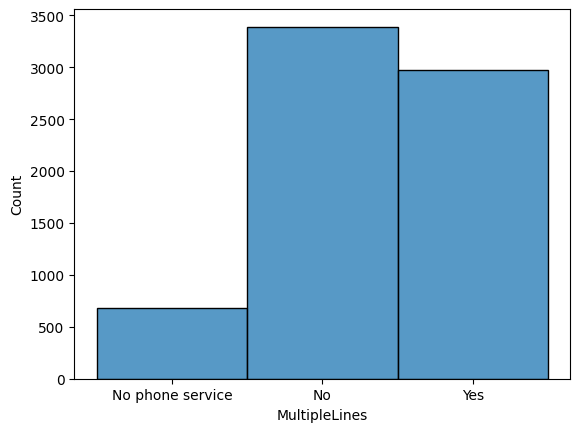

In [98]:
sns.histplot(data=df,x='MultipleLines')

<Axes: ylabel='tenure'>

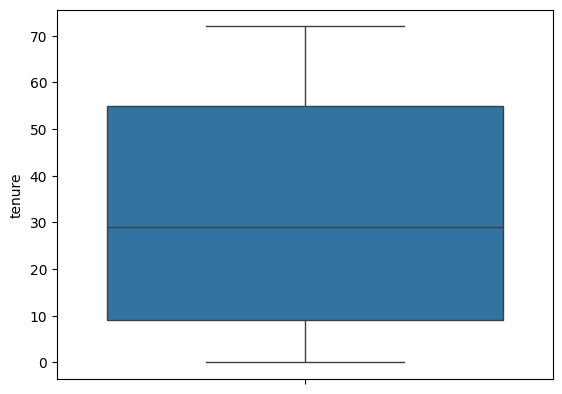

In [99]:
sns.boxplot(data=df,y='tenure')

<Axes: xlabel='count', ylabel='Contract'>

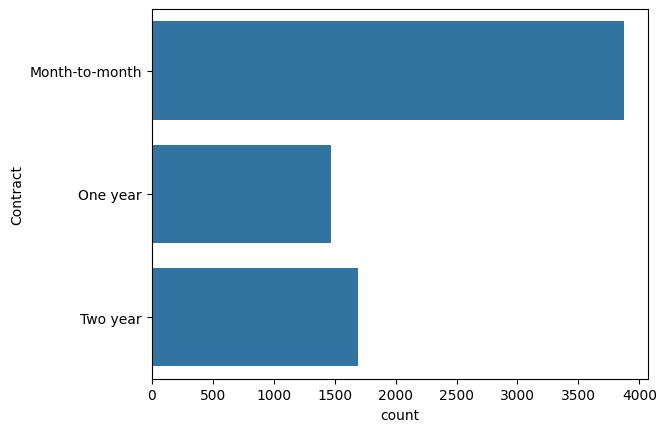

In [100]:
sns.countplot(data=df,y='Contract')

<Axes: xlabel='InternetService', ylabel='count'>

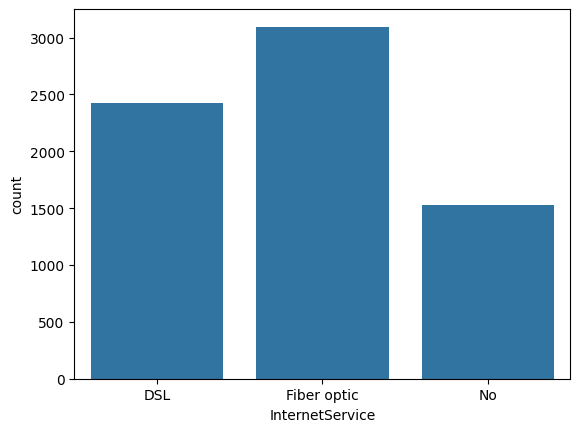

In [101]:
sns.countplot(data=df,x='InternetService')

<Axes: xlabel='count', ylabel='Churn'>

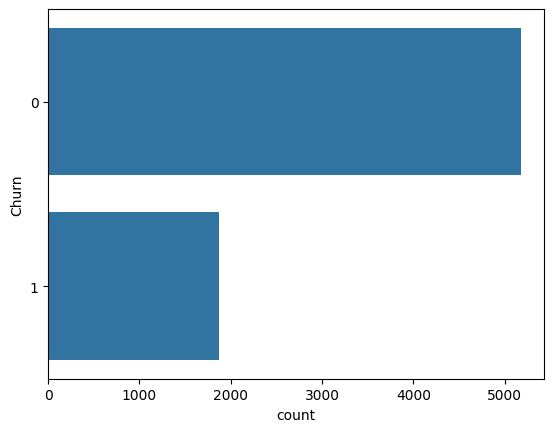

In [104]:
sns.countplot(data=df,y='Churn')

<Axes: >

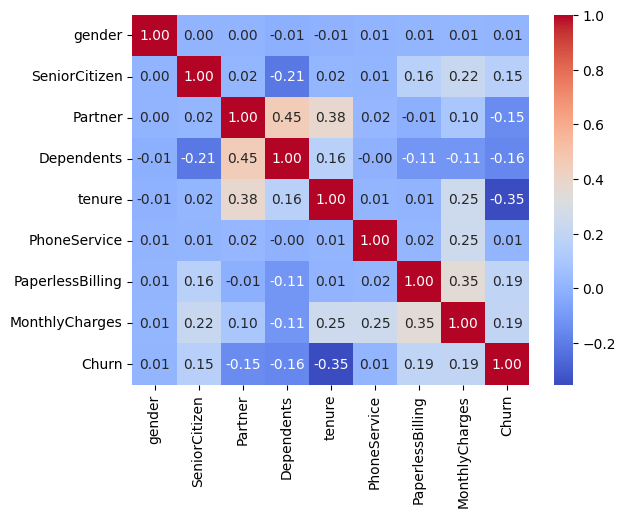

In [110]:
num_df = df.select_dtypes(include=["int64", "float64"])
corr_matrix = num_df.corr()
# plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
# plt.title("Корреляционная матрица числовых признаков", fontsize=14)
# plt.show()

In [111]:
X=df.drop(columns='Churn')

In [113]:
y=df['Churn']

In [126]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

In [127]:
X=pd.get_dummies(X)

In [128]:
X

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,MultipleLines_No,MultipleLines_No phone service,...,TotalCharges_995.35,TotalCharges_996.45,TotalCharges_996.85,TotalCharges_996.95,TotalCharges_997.65,TotalCharges_997.75,TotalCharges_998.1,TotalCharges_999.45,TotalCharges_999.8,TotalCharges_999.9
0,1,0,1,0,1,0,1,29.85,False,True,...,False,False,False,False,False,False,False,False,False,False
1,0,0,0,0,34,1,0,56.95,True,False,...,False,False,False,False,False,False,False,False,False,False
2,0,0,0,0,2,1,1,53.85,True,False,...,False,False,False,False,False,False,False,False,False,False
3,0,0,0,0,45,0,0,42.30,False,True,...,False,False,False,False,False,False,False,False,False,False
4,1,0,0,0,2,1,1,70.70,True,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,1,84.80,False,False,...,False,False,False,False,False,False,False,False,False,False
7039,1,0,1,1,72,1,1,103.20,False,False,...,False,False,False,False,False,False,False,False,False,False
7040,1,0,1,1,11,0,1,29.60,False,True,...,False,False,False,False,False,False,False,False,False,False
7041,0,1,1,0,4,1,1,74.40,False,False,...,False,False,False,False,False,False,False,False,False,False


In [129]:
X_test,X_temp,y_test,y_temp=train_test_split(X,y,test_size=0.3,random_state=42)

In [130]:
X_val,X_train,y_val,y_train=train_test_split(X_temp,y_temp,test_size=0.5,random_state=42)

In [131]:
preprocess=Pipeline([
    ('scaler', StandardScaler())
])

In [132]:
X_train_scaled = preprocess.fit_transform(X_train)
X_val_scaled   = preprocess.transform(X_val)
X_test_scaled  = preprocess.transform(X_test)

In [134]:
model=LogisticRegression(max_iter=1000)

In [135]:
model.fit(X_train_scaled,y_train)

LogisticRegression(max_iter=1000)

In [143]:
y_pred1=model.predict(X_val_scaled)

In [144]:
model.predict_proba(X[::])

/Users/daniilbabenko/PycharmProjects/PythonProject7/.venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


array([[4.02261546e-01, 5.97738454e-01],
       [9.99999995e-01, 4.58103189e-09],
       [3.65515345e-02, 9.63448466e-01],
       ...,
       [9.98021438e-01, 1.97856159e-03],
       [4.46136300e-03, 9.95538637e-01],
       [1.00000000e+00, 1.79621211e-16]])

In [145]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [146]:
accuracy_score(y_val,y_pred)

0.7774621212121212

In [147]:
confusion_matrix(y_val,y_pred)

array([[701,  77],
       [158, 120]])

In [148]:
y_pred2 =model.predict(X_test_scaled)

In [149]:
accuracy_score(y_test,y_pred2)

0.7651115618661257

In [153]:
!pip install xgboost



[notice] A new release of pip is available: 23.2.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [154]:
import xgboost as xgb

In [159]:
model2=xgb.XGBClassifier(
    n_estimators=100,       
    max_depth=2,            
    learning_rate=0.1,     
    use_label_encoder=False,
    eval_metric='logloss'   
)

In [160]:
model2.fit(X_train_scaled,y_train)

/Users/daniilbabenko/PycharmProjects/PythonProject7/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [13:34:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=2,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [161]:
y_pred3=model2.predict(X_test_scaled)

In [162]:
accuracy_score(y_test,y_pred3)

0.7991886409736308